# Model Selection

![Data Science Workflow](img/ds-workflow.png)

## Model Selection
- The process of selecting the model among a collection of candidates machine learning models

### Problem type
- What kind of problem are you looking into?
    - **Classification**: *Predict labels on data with predefined classes*
        - Supervised Machine Learning
    - **Clustering**: *Identify similarieties between objects and group them in clusters*
        - Unsupervised Machine Learning
    - **Regression**: *Predict continuous values*
        - Supervised Machine Learning
- Resource: [Sklearn cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### What is the "best" model?
- All models have some **predictive error**
- We should seek a model that is *good enough*

### Model Selection Techniques
- **Probabilistic Measures**: Scoring by performance and complexity of model.
- **Resampling Methods**: Splitting in sub-train and sub-test datasets and scoring by mean values of repeated runs.

In [1]:
import pandas as pd

In [2]:
data = pd.read_parquet('files/house_sales.parquet')
data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,3,3,2,7,5,...,61,0,0,0,0,NaN,0,2,2008,208500
2,20,80.0,9600,1,3,3,3,2,6,8,...,0,0,0,0,0,NaN,0,5,2007,181500
3,60,68.0,11250,1,2,3,3,2,7,5,...,42,0,0,0,0,NaN,0,9,2008,223500
4,70,60.0,9550,1,2,3,3,2,7,5,...,35,272,0,0,0,NaN,0,2,2006,140000
5,60,84.0,14260,1,2,3,3,2,8,5,...,84,0,0,0,0,NaN,0,12,2008,250000


In [3]:
data.describe()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,0.995890,2.591781,2.786301,2.998630,1.937671,6.099315,5.575342,...,46.660274,21.954110,3.409589,15.060959,2.758904,2.714286,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,0.063996,0.582296,0.678327,0.052342,0.276232,1.382997,1.112799,...,66.256028,61.119149,29.317331,55.757415,40.177307,1.253566,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,1.000000,2.000000,3.000000,3.000000,2.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,1.000000,3.000000,3.000000,3.000000,2.000000,6.000000,5.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,1.000000,3.000000,3.000000,3.000000,2.000000,7.000000,6.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,3.000000,2.000000,10.000000,9.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:ylabel='Frequency'>

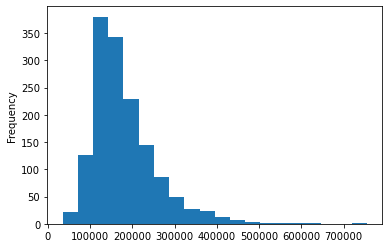

In [4]:
data['SalePrice'].plot.hist(bins=20)

### Converting to Categories
- [`cut()`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) Bin values into discrete intervals.
    - Data in bins based on data distribution.
- [`qcut()`](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) Quantile-based discretization function.
    - Data in equal size bins

#### Invstigation
- Figure out why `cut` is not suitable for 3 bins here.

In [6]:
data['Target'] = pd.cut(data['SalePrice'], bins=3, labels=[1, 2, 3])
data['Target'].value_counts()/len(data)

1    0.891781
2    0.102740
3    0.005479
Name: Target, dtype: float64

In [7]:
data['Target'] = pd.qcut(data['SalePrice'], q=3, labels=[1, 2, 3])
data['Target'].value_counts()/len(data)

2    0.335616
1    0.333562
3    0.330822
Name: Target, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

In [11]:
X = data.drop(['SalePrice', 'Target'], axis=1).fillna(-1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [12]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

/Users/rune/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7294520547945206

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

accuracy_score(y_test, y_pred)

0.7226027397260274

In [15]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.6746575342465754

In [16]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.4041095890410959

In [21]:
svc = SVC(kernel='poly', degree=5)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.4726027397260274